In [78]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from random import randint
from fastai.vision import *

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

import treeinterpreter as ti

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import sklearn.utils.validation

##import model
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## DL imports
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

## Pytorch has this 
#export
from torch import optim


#Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

In [48]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features_sc.csv')
test_features = pd.read_csv('data/testing_features_sc.csv')
train_labels = pd.read_csv('data/training_labels_proc.csv', names= ['score'])
test_labels = pd.read_csv('data/testing_labels_proc.csv' , names= ['score'])

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (69496, 48)
Testing Feature Size:   (29784, 48)
Training Labels Size:   (69496, 1)
Testing Labels Size:    (29784, 1)


In [49]:
train_features.head()

,CurrentLoanAmount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,log_Current Credit Balance,sqrt_Maximum Open Credit,log_Maximum Open Credit,LoanStatus_Charged Off,LoanStatus_Fully Paid,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.001171,0.029752,0.035463,0.184132,0.144737,0.000000,0.002425,0.000119,0.000000,0.0,0.652074,0.010907,0.572832,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006533,0.057573,0.047340,0.294910,0.131579,0.000000,0.012913,0.000664,0.000000,0.0,0.748705,0.025764,0.654096,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.022957,0.018410,0.333832,0.065789,0.083333,0.002418,0.000186,0.166667,0.0,0.651909,0.013647,0.594021,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002043,0.021447,0.027175,0.121257,0.105263,0.000000,0.001723,0.000252,0.000000,0.0,0.632322,0.015876,0.608321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.031225,0.056914,0.133234,0.118421,0.083333,0.004172,0.000140,0.166667,0.0,0.683430,0.011848,0.580652,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
## Scale both Training and test set


# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(train_labels)

# Transform both the training and testing data
train_labels = scaler.transform(train_labels)
#test_labels = scaler.transform(test_features)

In [87]:
train_labels
# mask = train_labels['score'] >= 710
# mask_low = train_labels['score'] < 710

(69496, 1)

In [83]:
# train_labels.loc[mask, 'score'] = 1
# train_labels.loc[mask_low, 'score'] = 0

In [84]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [88]:
train_X , valid_X = split_vals(train_features, 40000)
train_y , valid_y = split_vals(train_labels, 40000)
valid_y = np.ravel(valid_y)
train_y = np.ravel(train_y)
valid_y.shape


(29496,)

In [440]:
## Default model
m = RandomForestRegressor(max_features='auto', criterion='mse', max_depth=10,max_leaf_nodes=None, 
                          min_samples_split=4, min_samples_leaf=4, n_estimators=50,n_jobs=-1, 
                          min_weight_fraction_leaf=0.0, oob_score=True)

%time m.fit(train_X, train_y)

Wall time: 10 s
Parser   : 116 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [441]:
def mse(x,y): 
    x = scaler.inverse_transform(x.reshape(-1,1))
    y = scaler.inverse_transform(y.reshape(-1,1))
    return np.abs(y-x).mean()

def print_score(m):
    res = [mse(m.predict(train_X), train_y), mse(m.predict(valid_X), valid_y),
                m.score(train_X, train_y), m.score(valid_X, valid_y)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [442]:
mse(m.predict(valid_X), valid_y)

14.114348610257506

In [443]:
class RFmodel():
    def __init__(self, trees, criterion, x_train, y_train, x_valid, y_valid, depth=15, model=None):
            if(model != None):
                self.fit = False
                self.m = model
                self.x_train = x_train
                self.y_train = y_train
                self.x_valid = x_valid
                self.y_valid = y_valid
                
            else:
                self.fit = True
                self.m = RandomForestRegressor(max_features='auto', criterion=criterion, max_depth=depth,max_leaf_nodes=None, 
                          min_samples_split=4, min_samples_leaf=4, n_estimators=trees,n_jobs=-1, 
                          min_weight_fraction_leaf=0.0)
                
                self.x_train = x_train
                self.y_train = y_train
                self.x_valid = x_valid
                self.y_valid = y_valid
            print(self.m)
            
    def fit_model(self, dt = False):
        
        if(self.fit):
            print('Fitting model...')
            %time self.m = self.m.fit(self.x_train, self.y_train)

        if(dt):
            m = self.m
            print("Getting values from desicion trees...")
            dt_train = []
            dt_valid = []
            for dt in m.estimators_:
                dt_train.append(dt.predict(self.x_train))
                dt_valid.append(dt.predict(self.x_valid))
                                
            dt_train = torch.Tensor(dt_train)
            dt_valid = torch.Tensor(dt_valid)
            
            self.train_ds, self.valid_ds = self.getDataset(dt_train, dt_valid)
            return self.train_ds, self.valid_ds
            
    def getRfLoss(self):
        valid_pred = self.m.predict(self.x_valid)
        train_pred = self.m.predict(self.x_train)
        
        valid_loss = mse(valid_pred, self.y_valid)
        train_loss = mse(train_pred, self.y_train)
        
        return train_loss, valid_loss
    
    def getDataset(self, dt_train, dt_valid):
        print(dt_train.shape)
        print(dt_valid.shape)
         
        yb_train = np.array(self.y_train)
        yb_train = torch.Tensor(yb_train)
        
        yb_valid = np.array(valid_y)
        yb_valid = torch.Tensor(yb_valid)
        print(yb_valid.shape)
        print(yb_train.shape)

        xb_train = torch.Tensor(dt_train)
        xb_train = xb_train.t()
        
        xb_valid = torch.Tensor(dt_valid)
        xb_valid = xb_valid.t()
        print(xb_train.shape)
        print(xb_valid.shape)
        
        train_ds = TensorDataset(xb_train, yb_train)
        valid_ds = TensorDataset(xb_valid, yb_valid)
        
        return train_ds, valid_ds

In [444]:
rf = RFmodel(300, 'mae', train_X, train_y, valid_X, valid_y,model=m)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)


In [445]:
train_ds, valid_ds = rf.fit_model(True)
len(train_ds[0])

Getting values from desicion trees...
torch.Size([50, 40000])
torch.Size([50, 29496])
torch.Size([29496])
torch.Size([40000])
torch.Size([40000, 50])
torch.Size([29496, 50])


2

In [446]:
rf.m

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [447]:
t, v = rf.getRfLoss()
print(t, v)

13.038950607860254 14.114348610257506


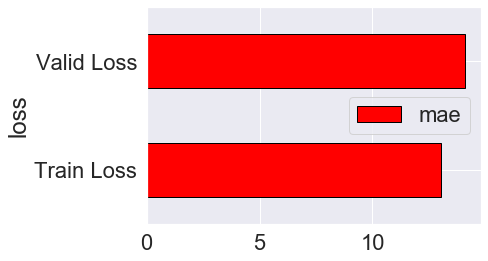

In [448]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'loss': ['Train Loss',
                                           'Valid Loss'],
                                 'mae': [t, v]})
model_comparison.plot(x = 'loss', y = 'mae', kind = 'barh', color = 'red', edgecolor = 'black')


In [449]:
class Recorder():
    def __init__(self):
        self.valid_losses, self.losses, self.lr, self.mse, self.mse_valid =[], [], [], [], []
        
    def accumulate(self,loss, mse, lr):
        self.losses.append(loss)
        self.mse.append(mse)
        self.lr.append(lr)
    
    def accumulate_v(self, loss, mse):
        self.valid_losses.append(loss)
        self.mse_valid.append(mse)
        
    def plot_loss(self):
        plt.plot(self.losses)
        return self.losses
    
    def plot_validloss(self):
        plt.plot(self.valid_losses)
        return self.valid_losses
    
    def plot_lr(self):
        plt.plot(self.lr)
        return self.lr
    
    def plot_mse(self):
        plt.plot(self.mse)
        plt.plot(self.mse_valid)
        return self.mse, self.mse_valid

In [486]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)


def getDNNmodel(n, lr = 1e-03):
    n = n
    nh = 500
    nh2 = 200
    nh3 = 60
    c = 1
    model = nn.Sequential(nn.Linear(n,nh), 
                          nn.ReLU(), 
                          nn.Linear(nh,nh2), 
                          nn.ReLU(), 
                          nn.Linear(nh2, nh3),
                          nn.ReLU(),
                          nn.Linear(nh3,1))

    
    return model, optim.Adam(model.parameters(), lr=lr, weight_decay=0.001)

In [487]:
def accuracy(out, yb): return (abs(out-yb)).float().mean()
loss_func =nn.MSELoss()

def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 3 epochs"""
    lr = 1e-03
    for param_group in optimizer.param_groups:
        lr = param_group['lr']
        if(epoch == 7):
            param_group['lr'] = lr / 2
            lr = lr / 10
    return lr

In [488]:
class RfDNN():
    def __init__(self, train_ds, valid_ds, error_metrics, trees, model=None, bs = 3000): 

        self.model = model
        self.train_ds = train_ds
        self.valid_ds = valid_ds
        self.bs = bs
        self.n = len(train_ds)
        self.nv = len(valid_ds)
        self.error_metrics = error_metrics
        self.record = Recorder()
        self.trees = trees
    
    @property
    def recorder(self):
        return self.record

    def runDNN(self, epoch):
        self.epoch = epoch
        
        if(self.model == None):
            self.model, self.opt = getDNNmodel(self.trees, lr= 1e-03)
            
        print(self.model)
        ## Refactored mini batch training
        bs = self.bs
        tot_loss,tot_acc, tot_mse = 0.,0.,0.
        for epoc in range(epoch):
            lr = adjust_learning_rate(self.opt, epoc)
            print('Learning rate: ', lr)
            for i in range((self.n-1)//bs + 1):
                
                self.xb, self.yb = train_ds[i*bs:i*bs+bs]
                xb, yb = self.xb, self.yb.unsqueeze(-1)
                pred = self.model(xb)
                loss = loss_func(pred, yb)
                loss.backward()
                self.opt.step()
                self.opt.zero_grad()
                print('#', end="")
                acc_loss = accuracy(pred, yb)
                mse = self.error_metrics(pred, yb)
                self.record.accumulate([loss.detach().cpu() ,acc_loss], mse, lr)
            
            print()
            print('For epoch', epoc, ' loss:', loss.detach().cpu().numpy(), 'acc:',acc_loss.detach().numpy(),'mse:', mse)
            
            with torch.no_grad():
                
                for i in range((self.nv-1)//bs + 1):
                    xb, yb = valid_ds[i*bs:i*bs+bs]
                    yb = yb.unsqueeze(-1)
                    pred_v = self.model(xb)
                    loss_v = loss_func(pred_v, yb)
                    acc_v = accuracy(pred_v, yb)
                    mse_v = self.error_metrics(pred_v, yb)
                    self.record.accumulate_v([loss_v.detach().cpu().numpy() ,acc_v], mse)
                print('Valid_loss:', loss_v.detach().cpu().numpy(),'valid_acc:',acc_v.numpy(), ' mse:', mse_v)
                print()
                
        
    def getValidError(self, rows):
        self.xv, self.yv = valid_ds[:rows]
        pred = self.model(self.xv)
        print('Valid accuracy: ', self.error_metrics(pred.squeeze(-1), self.yv))
        
        return pred, self.error_metrics(pred.squeeze(-1), self.yv)

In [492]:
rfDNN = RfDNN(train_ds, valid_ds, mse,trees = 200, bs=2000)

In [493]:
rfDNN.runDNN(10)

Sequential(
  (0): Linear(in_features=200, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=1, bias=True)
)
Learning rate:  0.001
####################
For epoch 0  loss: 0.024641411 acc: 0.14162186 mse: 23.509222151538356
Valid_loss: 0.033251863 valid_acc: 0.15245757  mse: 25.30795435511313

Learning rate:  0.001
####################
For epoch 1  loss: 0.0072380845 acc: 0.06766941 mse: 11.233122388770804
Valid_loss: 0.014294051 valid_acc: 0.09120353  mse: 15.139781168034489

Learning rate:  0.001
####################
For epoch 2  loss: 0.005751418 acc: 0.051426206 mse: 8.536750010659919
Valid_loss: 0.013211349 valid_acc: 0.07839263  mse: 13.013179425165097

Learning rate:  0.001
####################
For epoch 3  loss: 0.0056848675 acc: 0.050203368 mse: 8.333760339906439
Valid_loss: 0.0132181775 valid_acc:

In [494]:
preds, _ = rfDNN.getValidError(20000)
preds = np.ravel(preds.detach().cpu().numpy())



Valid accuracy:  13.299826160535961


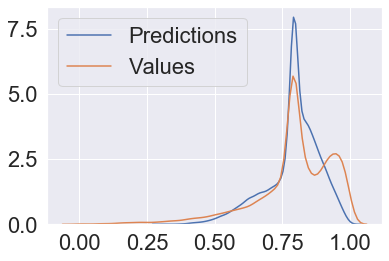

In [495]:
sns.kdeplot(preds, label = 'Predictions')
sns.kdeplot(valid_y[:20000], label = 'Values')

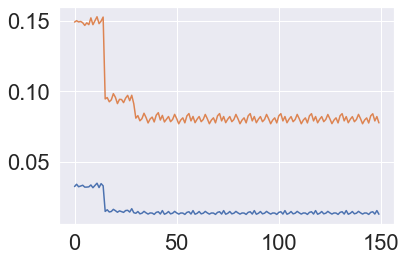

In [496]:
lss = rfDNN.recorder.plot_validloss()

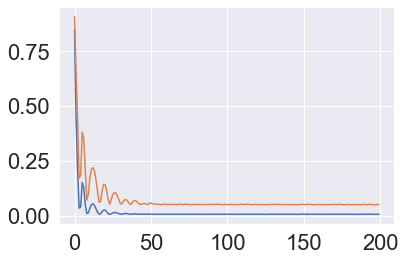

In [497]:
_ = rfDNN.recorder.plot_loss()

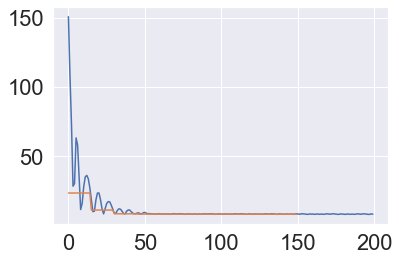

In [498]:
_, _= rfDNN.recorder.plot_mse()

### Run the model on different number of trees

In [328]:
# Dataframe to hold the results
rfdnn_chart = pd.DataFrame(columns = ['Trees',
                                      'RFtrainLoss',
                                      'RFvalidLoss'])
dicto = {
    "Trees": 500,
    "RFtrainLoss": t,
    "RFvalidLoss": v
}

valid_acc, DNN_loss, DNN_valid, DNN_mse =[], [], [], []

rfdnn_chart



,Trees,RFtrainLoss,RFvalidLoss


## Rfdnn training

Fitting RF with trees  5
Wall time: 1.65 s
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
RF train: 9.458812034085605  RF valid: 14.189863781843846
Getting values from desicion trees...
torch.Size([5, 40000])
torch.Size([5, 29496])
torch.Size([29496])
torch.Size([40000])
torch.Size([40000, 5])
torch.Size([29496, 5])
Running DNN for trees:  5 Learning rate: 1e-03
Sequential(
  (0): Linear(in_features=5, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): 

For epoch 6  loss: 0.0055546965 acc: 0.049986165 mse: 8.297704168429599
Valid_loss: 0.013909012 valid_acc: 0.080225684  mse: 13.317461599556003

Learning rate:  0.0001
####################
For epoch 7  loss: 0.005543722 acc: 0.04971933 mse: 8.25340950951539
Valid_loss: 0.013912792 valid_acc: 0.08010575  mse: 13.297553976225782

Learning rate:  0.0002
####################
For epoch 8  loss: 0.005540185 acc: 0.04967631 mse: 8.246267357965932
Valid_loss: 0.0139158135 valid_acc: 0.0801077  mse: 13.297879402485881

Learning rate:  0.0002
####################
For epoch 9  loss: 0.00553478 acc: 0.049682163 mse: 8.247240424832329
Valid_loss: 0.013920038 valid_acc: 0.08015866  mse: 13.306336616126094

Valid accuracy:  13.828066130319982
Fitting RF with trees  20
Wall time: 4.31 s
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
           

For epoch 2  loss: 0.0068126475 acc: 0.055919692 mse: 9.282669429084287
Valid_loss: 0.013570955 valid_acc: 0.07996355  mse: 13.273947531442074

Learning rate:  0.001
####################
For epoch 3  loss: 0.0065306937 acc: 0.055033036 mse: 9.135483963957057
Valid_loss: 0.01336671 valid_acc: 0.07919586  mse: 13.146513009488702

Learning rate:  0.001
####################
For epoch 4  loss: 0.00572893 acc: 0.051087677 mse: 8.480554554393516
Valid_loss: 0.013256584 valid_acc: 0.07861805  mse: 13.05059660632004

Learning rate:  0.001
####################
For epoch 5  loss: 0.005267042 acc: 0.049683835 mse: 8.24751554895006
Valid_loss: 0.013408744 valid_acc: 0.080873065  mse: 13.424929373359737

Learning rate:  0.001
####################
For epoch 6  loss: 0.005221295 acc: 0.049852565 mse: 8.275524142405018
Valid_loss: 0.013370588 valid_acc: 0.07843731  mse: 13.020593678842692

Learning rate:  0.0001
####################
For epoch 7  loss: 0.005125994 acc: 0.048405703 mse: 8.03534794743918


Running DNN for trees:  200 Learning rate: 1e-03
Sequential(
  (0): Linear(in_features=200, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
)
Learning rate:  0.001
####################
For epoch 0  loss: 0.010512805 acc: 0.08570389 mse: 14.226848347863182
Valid_loss: 0.02007048 valid_acc: 0.12030114  mse: 19.969988634276955

Learning rate:  0.001
####################
For epoch 1  loss: 0.007145085 acc: 0.057418987 mse: 9.531550456693395
Valid_loss: 0.013584521 valid_acc: 0.07975974  mse: 13.240118038641379

Learning rate:  0.001
####################
For epoch 2  loss: 0.006889518 acc: 0.05609979 mse: 9.312565290948376
Valid_loss: 0.013566417 valid_acc: 0.079685666  mse: 13.227819940618135

Learning rate:  0.001
####################
For epoch 3  loss: 0.006757846 acc: 0.05550671 mse: 9.21411

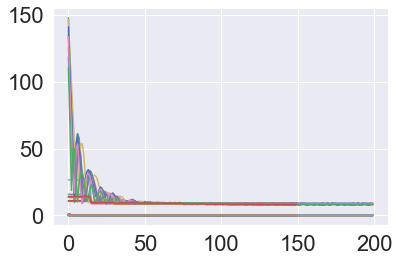

In [462]:

trees = [5,10,15,20,25,40,50, 100, 200]
for tree in trees:
    ## Default model
    model = RandomForestRegressor(max_features='auto', criterion='mse', max_depth=20,max_leaf_nodes=None, 
                              min_samples_split=4, min_samples_leaf=4, n_estimators=tree,n_jobs=-1)
    
    print("Fitting RF with trees ", tree)
    %time model.fit(train_X, train_y)
    rf = RFmodel(300, 'mae', train_X, train_y, valid_X, valid_y, model=model)
    rf.m
    t, v = rf.getRfLoss()
    print("RF train:",t," RF valid:", v)
    
    dicto = {
    "Trees": tree,
    "RFtrainLoss": t,
    "RFvalidLoss": v
    }
    
    rfdnn_chart = rfdnn_chart.append(dicto, ignore_index = True)
    
    
    train_ds, valid_ds = rf.fit_model(True)
    
    print("Running DNN for trees: ", tree, "Learning rate: 1e-03")
    
    rfDNN = RfDNN(train_ds, valid_ds, mse,trees = tree, bs=2000)
    rfDNN.runDNN(10)
    _, val_acc = rfDNN.getValidError(20000)
    valid_acc.append(val_acc)
    
    loss = rfDNN.recorder.plot_loss()
    valid_loss = rfDNN.recorder.plot_validloss()
    
    DNN_loss.append(loss)
    DNN_valid.append(valid_loss)
    DNN_mse.append(rfDNN.recorder.plot_mse())
    
    

In [466]:
valid_acc[-9:]

[14.34919474997893,
 13.903242274663597,
 13.828066130319982,
 13.647044108853489,
 13.617616356114299,
 13.514931507665663,
 13.442669846779854,
 13.32915478676632,
 13.351607139027864]

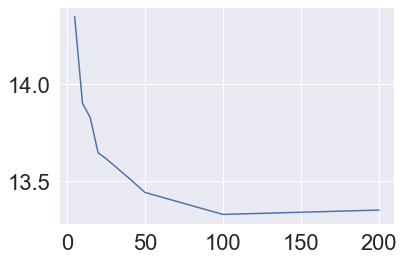

In [468]:
#valid_acc = [14.327687856320292, 13.908050280700625, 13.835922433082015, 13.80290648671873, 13.644046763748676,  13.609881568225473, 13.572946754029394, 13.457833254355938,  13.600723974976688]
plt.plot(trees, valid_acc[-9:])
plt.show()

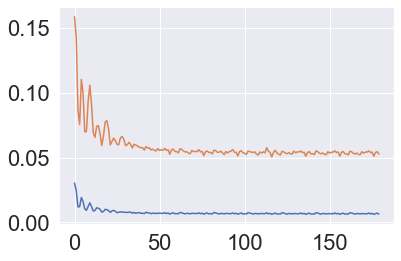

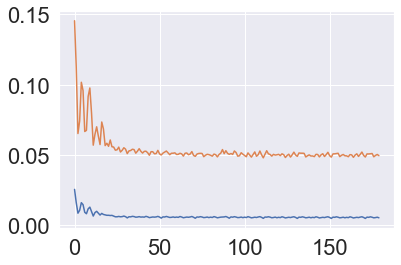

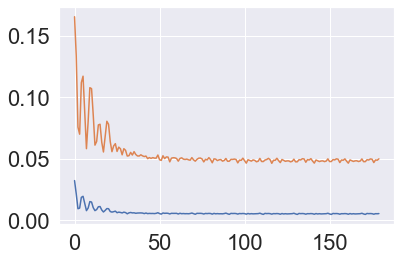

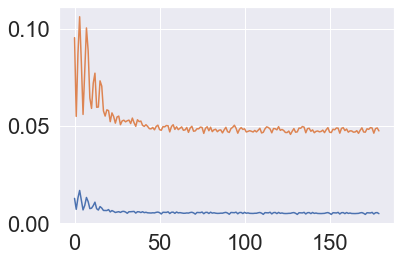

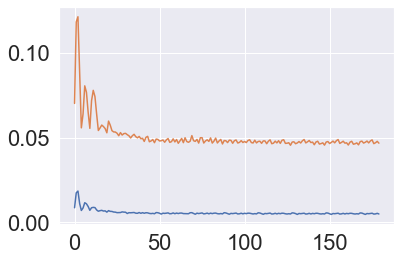

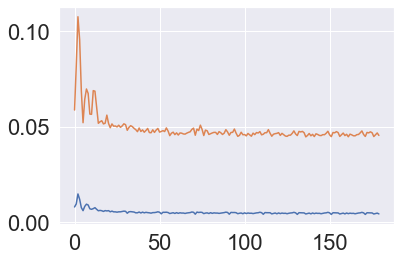

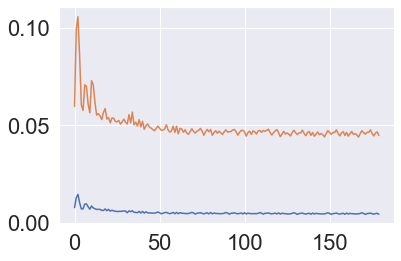

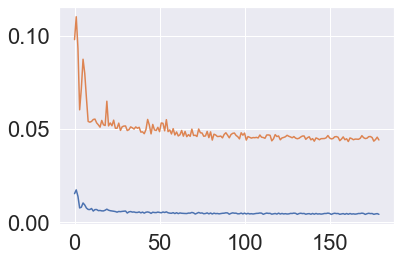

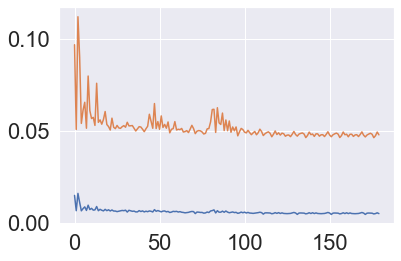

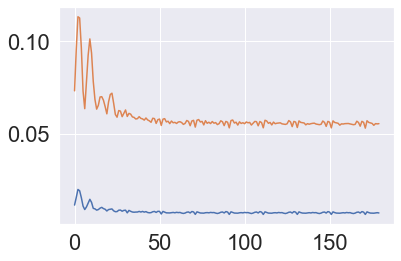

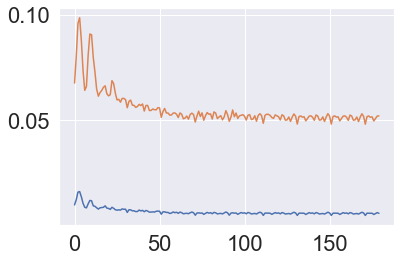

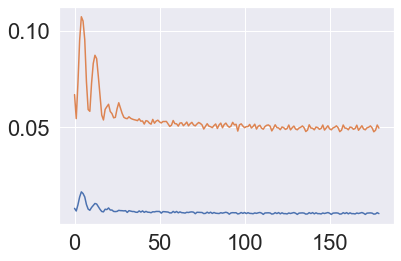

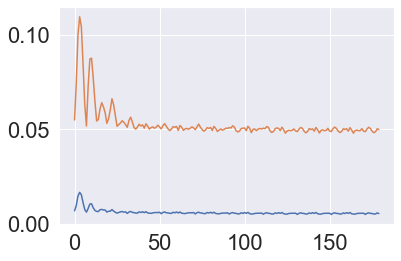

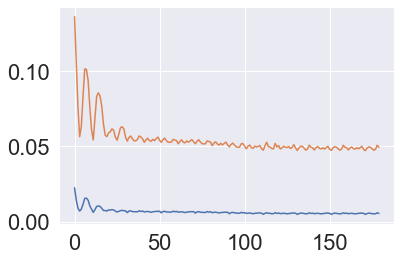

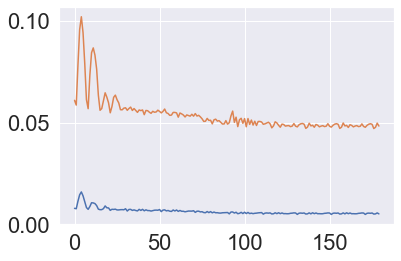

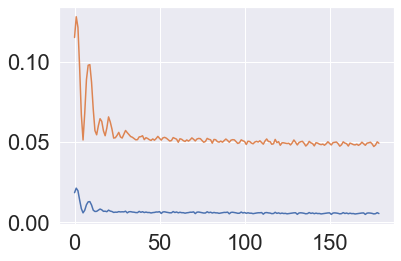

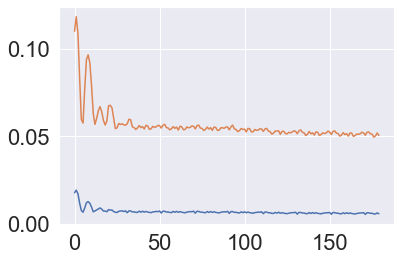

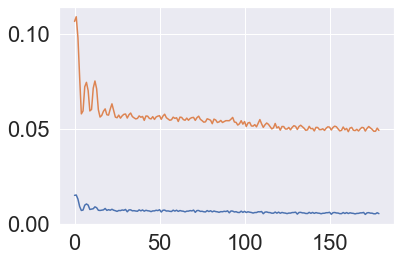

In [469]:
for i in range(len(DNN_loss)):
    plt.figure(i)
    plt.plot(DNN_loss[i][-180:])

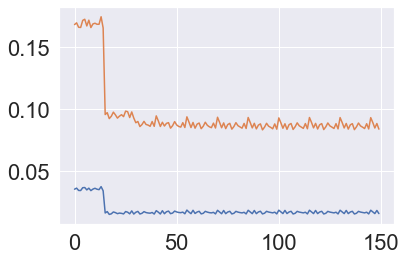

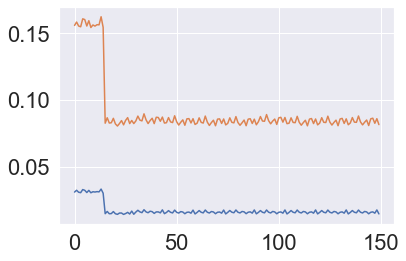

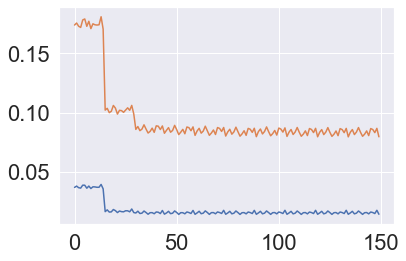

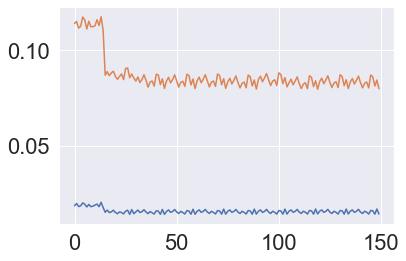

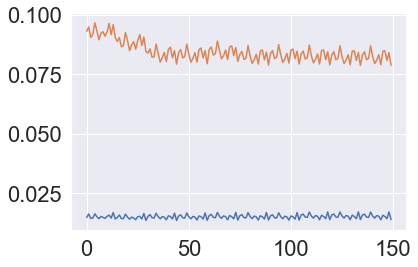

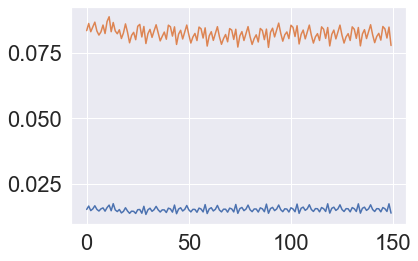

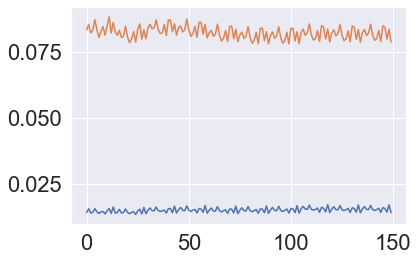

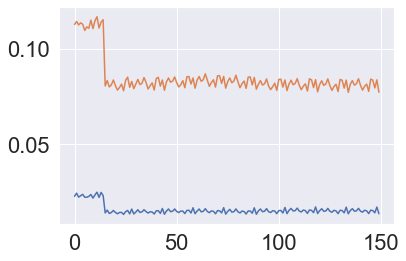

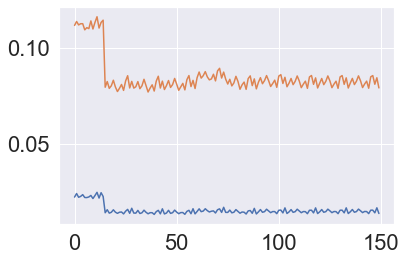

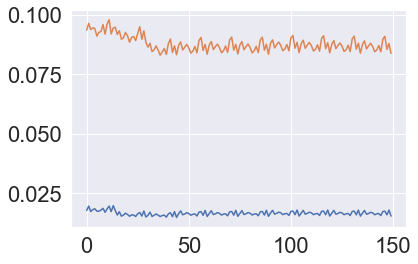

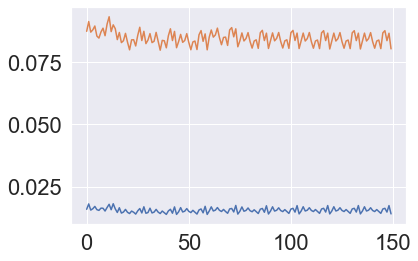

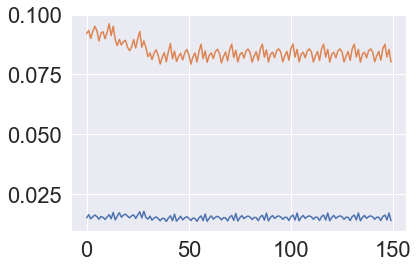

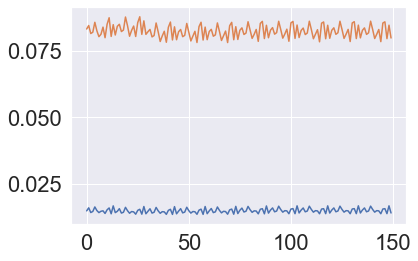

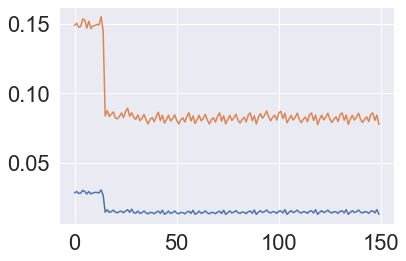

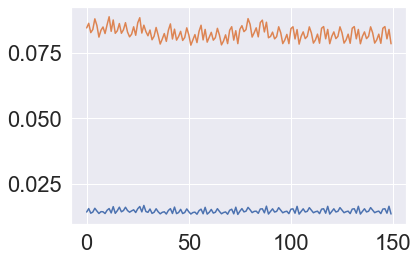

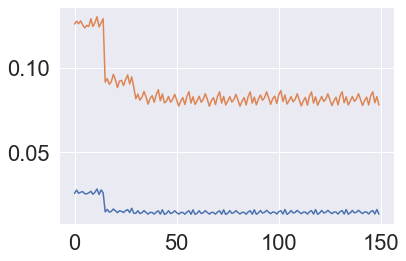

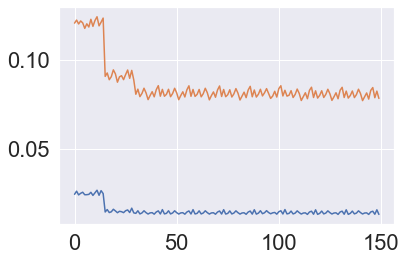

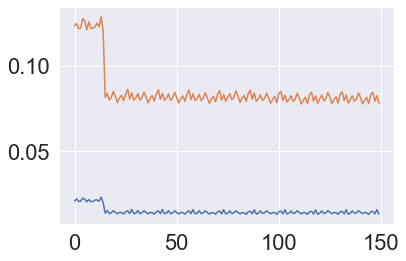

In [470]:
for i in range(len(DNN_valid)):
    plt.figure(i)
    plt.plot(DNN_valid[i])

In [500]:
rfdnn_chart

,Trees,RFtrainLoss,RFvalidLoss
0,5.0,9.458812,14.189864
1,10.0,8.980413,13.820704
2,15.0,8.811652,13.736774
3,20.0,8.821618,13.566430
4,25.0,8.749596,13.549623
5,40.0,8.711542,13.486054
6,50.0,8.697743,13.487242
7,100.0,8.611256,13.429847
8,200.0,8.606099,13.413264


In [ ]:
# class Dataset(object):
#     """An abstract class representing a Dataset.

#     All other datasets should subclass it. All subclasses should override
#     ``__len__``, that provides the size of the dataset, and ``__getitem__``,
#     supporting integer indexing in range from 0 to len(self) exclusive.
#     """
#     def __init__(self, x,y):
#         self.x, self.y = x , y
        
#     def __getitem__(self, i):
#         return self.x[i], self.y[i]
    
#     def __len__(self):
#         return self.x.shape[1]
#     def total_size(self):
#         return self.x.shape[0]